In [ ]:
import cv2 
import numpy as np
import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
def load_data():
    all_images = []
    all_labels = []
    lb = LabelBinarizer()

    for index, item in enumerate(glob.glob('/Users/armingolzar/Machine Learning Study Project/kapcha/*/*')):
        img = cv2.imread(item)
        img = cv2.resize(img, (32, 32))
        img = img/255.0
        all_images.append(img)

        label = item.split('/')[5]
        all_labels.append(label)

        if index%100 == 0:
            print('[INFO] {}/2000 data were processed'.format(index))

    all_images = np.array(all_images)
    all_labels = lb.fit_transform(all_labels)
    
    x_train, x_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)
    
    return x_train, x_test, y_train, y_test

In [ ]:
x_train, x_test, y_train, y_test = load_data()

In [22]:
def CNN_Net():
    net = models.Sequential([
                            layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
                            layers.BatchNormalization(),
                            layers.MaxPool2D((2, 2)),
                            layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
                            layers.BatchNormalization(),
                            layers.MaxPool2D((2,2)), 
                            layers.Flatten(),
                            layers.Dense(32, activation='relu'),
                            layers.BatchNormalization(),
                            layers.Dense(9, activation='softmax')
                            ])
    net.compile(loss = 'categorical_crossentropy',
                optimizer = 'sgd',
                metrics = ['accuracy'])
    
    return net

In [23]:
net = CNN_Net()

In [14]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1609, 32, 32, 3)
(1609, 9)
(403, 32, 32, 3)
(403, 9)


In [15]:
H = net.fit(x_train, y_train, epochs=20, batch_size=32, validation_data = (x_test, y_test))

2023-02-28 18:29:55.158918: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/20
51/51 [==============================] - 2s 26ms/step - loss: 0.5529 - accuracy: 0.8820 - val_loss: 2.3728 - val_accuracy: 0.3176
Epoch 2/20
51/51 [==============================] - 1s 20ms/step - loss: 0.0892 - accuracy: 0.9982 - val_loss: 2.6157 - val_accuracy: 0.2457
Epoch 3/20
51/51 [==============================] - 1s 19ms/step - loss: 0.0667 - accuracy: 0.9994 - val_loss: 2.6803 - val_accuracy: 0.2184
Epoch 4/20
51/51 [==============================] - 1s 19ms/step - loss: 0.0562 - accuracy: 0.9996 - val_loss: 2.6147 - val_accuracy: 0.2184
Epoch 5/20
51/51 [==============================] - 1s 20ms/step - loss: 0.0506 - accuracy: 0.9996 - val_loss: 2.4315 - val_accuracy: 0.3176
Epoch 6/20
51/51 [==============================] - 1s 20ms/step - loss: 0.0606 - accuracy: 0.9968 - val_loss: 1.9962 - val_accuracy: 0.4169
Epoch 7/20
51/51 [==============================] - 1s 21ms/step - loss: 0.0462 - accuracy: 0.9979 - val_loss: 1.5158 - val_accuracy: 0.4715
Epoch 8/20
51

In [25]:
def visualization(H):
    plt.plot(H.history['accuracy'], label = 'train_accuracy')
    plt.plot(H.history['val_accuracy'], label = 'test_accuracy')
    plt.plot(H.history['loss'], label = 'train_loss')
    plt.plot(H.history['val_loss'], label = 'test_loss')
    plt.xlabel('epochs')
    plt.ylabel('accuracy/loss')
    plt.title('kapcha classification')
    plt.legend()
    plt.show() 

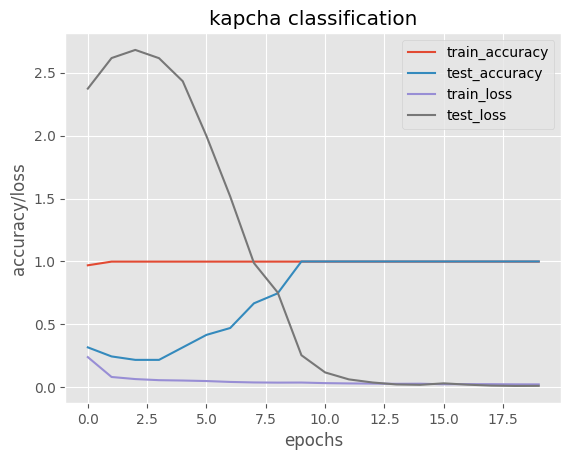

In [26]:
visualization(H)

In [1]:
net.save('kapcha_classifier.h5')

NameError: name 'net' is not defined